# Homework 01
## Notebook 2

Components of the Group:

    Crnigoj Gabriele 134176
    Ferraro Tommaso 132998
    Stinat Kevin 134905
 
 
<font color='green'>Note</font>: in red we write some comment for each exercise. At the end of this Notebook it can be found our conclusion

## Step 3: preparation for clustering

### EXERCISE 7 

In order to test that the data has been successfully stored, try to load it from a
different notebook and verify that it is consistent.

<font color='red'>**Comment:**</font> they have the same request, we discuss it further below.

# Clustering the top 100 Greatest Movies of All Time (Part 2)

### EXERCISE 8

Create a new notebook and load the saved tfidf_matrix from the file using the `joblib.load(filename)` function.

<font color='red'>**Comment:**</font> before we load the file, we check if the directory in which we look for the file exists.

In [1]:
import pandas as pd
import os
from tqdm import tqdm
import joblib

In [2]:
os.path.exists('tf_idfmatrix')

True

In [3]:
from tempfile import mkdtemp
savedir = 'tf_idfmatrix'

<font color='red'>**Note:**</font> we load and dump the file with "joblib" insted of "pickle" because we want to load and dump the data in the right way in order to avoid the possibilities of errors during the reading step.

In [4]:
filename = os.path.join(savedir, 'tf_idfmatrix_file') 

with open(filename,'rb') as r:
    temp = joblib.load(r)
    
temp.head()

,The Godfather,The Shawshank Redemption,Schindler's List,Raging Bull,Casablanca,Citizen Kane,Gone with the Wind,The Wizard of Oz,One Flew Over the Cuckoo's Nest,Lawrence of Arabia,...,The Great Dictator,Double Indemnity,The Maltese Falcon,Wuthering Heights,Taxi Driver,Rear Window,The Third Man,Rebel Without a Cause,North by Northwest,Yankee Doodle Dandy
abandon,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.146868,...,0.061641,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.046527,0.032028,0.0
abl,0.000000,0.031679,0.045263,0.000000,0.0,0.000000,0.017478,0.0,0.044618,0.000000,...,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.015240,0.0
accept,0.036546,0.000000,0.000000,0.000000,0.0,0.000000,0.030619,0.0,0.039084,0.000000,...,0.000000,0.0,0.05939,0.0,0.0,0.000000,0.027371,0.000000,0.000000,0.0
accompani,0.022303,0.000000,0.000000,0.054811,0.0,0.000000,0.018686,0.0,0.000000,0.000000,...,0.000000,0.0,0.00000,0.0,0.0,0.037763,0.016704,0.000000,0.016294,0.0
across,0.000000,0.000000,0.000000,0.046831,0.0,0.078485,0.047896,0.0,0.000000,0.000000,...,0.000000,0.0,0.00000,0.0,0.0,0.161323,0.028544,0.000000,0.013921,0.0


## Step 4: Clustering

### EXERCISE 9

The `sklearn.cluster.AgglomerativeClustering` class performs a hierarchical
clustering (agglomerative, i.e., bottom-up). The relevant parameters for
constructing a clustering model are:\
- `n_clusters the number of clusters` (that is, where to cut the
dendrogram)
- `affinity` the similarity measure to be used ('euclidean', 'manhattan',
'cosine', 'precomputed)
- `linkage` the type of linkage to use to decide agglomeration ('ward',
'complete' maximum, 'average', 'single' minimum)

Try to create an agglomerative clustering model with 5 clusters using the
`cosine` similarity and fit the model. Use the `fit_predict()` function that
automatically returns the clustering.

<font color='red'>**Comment:**</font> First of all, we have obtained the transposed matrix since the purpose of our analysis is to derive the clustering of each film according to the words contained in its own synopsis.

In [5]:
from sklearn.cluster import AgglomerativeClustering as AC

tf_idfmatrix = temp.T
tf_idfmatrix.head()

,abandon,abl,accept,accompani,across,act,action,admit,afterward,agre,...,woman,women,word,work,world,would,wound,year,york,young
The Godfather,0.0,0.000000,0.036546,0.022303,0.000000,0.020218,0.000000,0.020534,0.022303,0.066700,...,0.016468,0.000000,0.021920,0.000000,0.019333,0.059863,0.0,0.073131,0.020861,0.063500
The Shawshank Redemption,0.0,0.031679,0.000000,0.000000,0.000000,0.015352,0.017556,0.000000,0.016935,0.063307,...,0.012504,0.017238,0.033288,0.119345,0.014679,0.034091,0.0,0.155481,0.000000,0.012054
Schindler's List,0.0,0.045263,0.000000,0.000000,0.000000,0.000000,0.050167,0.000000,0.000000,0.000000,...,0.071464,0.344817,0.000000,0.056839,0.083894,0.032472,0.0,0.000000,0.000000,0.000000
Raging Bull,0.0,0.000000,0.000000,0.054811,0.046831,0.000000,0.000000,0.050463,0.000000,0.000000,...,0.000000,0.000000,0.053870,0.000000,0.000000,0.000000,0.0,0.107835,0.051267,0.000000
Casablanca,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.064555,0.038574,0.113870,0.088149,0.0,0.043075,0.122871,0.000000


In [6]:
tf_idfmatrix.describe()

,abandon,abl,accept,accompani,across,act,action,admit,afterward,agre,...,woman,women,word,work,world,would,wound,year,york,young
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.012924,0.011200,0.015325,0.009549,0.015019,0.012455,0.009442,0.010950,0.011682,0.020693,...,0.026577,0.016108,0.011747,0.033929,0.021616,0.028333,0.016953,0.025724,0.017438,0.024794
std,0.027393,0.022243,0.026436,0.023439,0.027549,0.024385,0.022158,0.021252,0.026646,0.030372,...,0.042243,0.045463,0.025673,0.043086,0.045059,0.036285,0.037743,0.034082,0.039268,0.035732
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.023096,0.000000,0.011785,0.000000,0.009539,0.000000,0.000000
75%,0.000000,0.011138,0.027538,0.000000,0.028604,0.015195,0.000000,0.016296,0.000000,0.038411,...,0.041889,0.000000,0.000000,0.044032,0.021940,0.050989,0.000000,0.038416,0.015932,0.038054
max,0.146868,0.098458,0.119320,0.173392,0.161323,0.104788,0.119835,0.104021,0.145634,0.125342,...,0.184554,0.344817,0.135424,0.193730,0.271825,0.139134,0.215045,0.155481,0.229369,0.163556


<font color='red'>**Comment:**</font> we proceed doing the clustering with different technique. In the second parte of this analysis, we focus on the differences among all the analysis, in particular we'll look for the best linkage that makes the better clustering.


<font color='red'>**Note:**</font> attributes of the AgglomerativeClustering class:
- **linkage**: criterion determines which distance to use between sets of observation.
- **n_clusters**: is the number of clusters (from 0 to 4 in this case).
- **affinity**: is the type of distance used to cluster. **The "cosine" affinity is very suitable for the analysis of vectors made by words (instead of 'euclidian and manhattan' affinity)**, so we don't change that parameter.
- **fit_predict**: performs clustering on tf_idfmatrix and returns cluster labels.

In [7]:
labels_complete = AC(n_clusters = 5, affinity = 'cosine', linkage = 'complete').fit_predict(tf_idfmatrix)
labels_complete

array([0, 0, 1, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 4, 2, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 4, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 4, 0, 1, 0, 0, 0, 0, 3, 4,
       4, 0, 0, 0, 0, 0, 4, 2, 0, 0, 3, 0, 0, 1, 4, 1, 0, 0, 0, 4, 0, 2,
       3, 3, 1, 0, 0, 3, 0, 1, 0, 4, 0, 3], dtype=int64)

In [8]:
labels_average = AC(n_clusters = 5, affinity = 'cosine', linkage = 'average').fit_predict(tf_idfmatrix)
labels_average

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 4, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3], dtype=int64)

In [9]:
labels_single = AC(n_clusters = 5, affinity = 'cosine', linkage = 'single').fit_predict(tf_idfmatrix)
labels_single

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 2, 0, 0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

### EXERCISE 10
Compute the silhouette score of the given clustering. To do that, you can use the `sklearn.metrics.silhouette_score()` function. Notice that you have to specify the `metric` parameter in order to be consistent with the affinity measure used in the clustering model.

In [10]:
from sklearn import metrics

In [11]:
#metric because i want to be consistent with the affinity used in AgglomerativeClustering
metrics.silhouette_score(tf_idfmatrix, labels_complete, metric = 'cosine')

0.08554533819757427

In [12]:
metrics.silhouette_score(tf_idfmatrix, labels_average, metric = 'cosine')

0.16891633230532044

In [13]:
metrics.silhouette_score(tf_idfmatrix, labels_single, metric = 'cosine')

0.11651726317250966

<font color='red'>**Comment:**</font>As we can notice the best Silhouette Score is the one associated with the **'average' linkage**. This because **the more the value is near to 1, the more the clusters are highly separated**. By contrast, negative Silhouette Scores indicate more mixage of the data point through the clusters. 

The choice is not easy as we think because the silhouette's values are very similar each other and very near to 0 so the clusters are not so clearly recognizable, but as the theory defines we choose the highest one. So we choose the labels with **Average Linkage**


### EXERCISE 11

Try to apply the **elbow** method to select the best value of the number of clusters for the `AgglomerativeClustering` (leaving all the other parameters unchanged). 

In particular, try to get the silhouette score for all the values in the range . If the silhouette values are stored in a pandas dataframe with two columns `n_clusters` , `score` , you can use the following fragment to plot the data.

`import seaborn as sns
sns.lineplot(x='n_clusters', y='score', data=data)`

```
    N_CLUSTERS   SCORE
    2            0.160984
    3            0.103641
    4            0.074664
    5            0.074463
    6            0.075098
    7            0.074375
    8            0.074565
    9            0.075074
    10           0.075540
```

In [14]:
#we'll create the column 'silhouettes_score' when the score is calculated
silhouette_df = pd.DataFrame({'n_clusters':[x for x in range(2,13)]})

In [15]:
for i in range(0,10):  #the dataframe 8 rows
    
    temp_clustering = AC(n_clusters = silhouette_df.n_clusters[i], affinity = 'cosine', linkage = 'average').fit_predict(tf_idfmatrix)
    
    silhouette_df.loc[[i],'score'] = metrics.silhouette_score(tf_idfmatrix, temp_clustering, metric = 'cosine')
    

<font color='red'>**Comment:**</font>It has been executed the AgglomerativeClustering with the average linkage, which is the best to use in this case as the previous step highlights, and with a number of clusters from 2 to 10. It has been saved into a DataFrame and then, with the elbow method, we'll display what is the best number of clusters to use in this sample.


In [16]:
silhouette_df

,n_clusters,score
0,2,0.268999
1,3,0.220843
2,4,0.185992
3,5,0.168916
4,6,0.137356
5,7,0.122555
6,8,0.110563
7,9,0.096037
8,10,0.093843
9,11,0.082382


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Elbow Method AgglomerativeClustering (Average)')

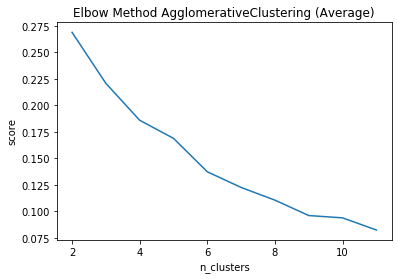

In [18]:
sns.lineplot(x = 'n_clusters', y = 'score', data = silhouette_df)
plt.title('Elbow Method AgglomerativeClustering (Average)')

<font color='red'>**Comment:**</font>**The less number of clusters we use, the more we can notice a peak in the diagram.** It means that the data division among the clusters is better because the Sihlouette Score is nearer to 1. With the other linkages the curve would dive to the bottom earlier with the increment of the number of clusters. It is interesting to notice that **there is a trend recovery, which decrease with a lower slope, when the number of clusters is 4.** Following it, the Silhoulette Score decrease get steady with the clusters increase.

For this reason we choose 4 as a number of clusters because there is a minimum decrease of silhuette value

In [19]:
labels_average2 = AC(n_clusters = 4, affinity = 'cosine', linkage = 'average').fit_predict(tf_idfmatrix)
labels_average2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3], dtype=int64)

In [20]:
metrics.silhouette_score(tf_idfmatrix, labels_average2, metric = 'cosine')

0.1859915192302945

### EXERCISE 12 
Perform the clustering and evaluation steps also with other clustering methods from the `scikit-learn` library. Set the number of clusters, or the other algorithm parameters using the Elbow method. Compare the results with those obtained through the Agglomerative Clustering.

**K-MEANS with 5 clusters**

In [62]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5).fit_predict(tf_idfmatrix)
kmeans

array([4, 0, 3, 4, 0, 0, 3, 0, 0, 3, 0, 0, 4, 0, 0, 4, 3, 2, 0, 3, 0, 0,
       0, 0, 3, 0, 0, 3, 0, 3, 3, 4, 3, 4, 3, 3, 3, 0, 3, 0, 4, 4, 0, 4,
       3, 0, 0, 4, 0, 3, 3, 0, 3, 3, 0, 3, 0, 4, 3, 0, 0, 4, 4, 0, 1, 4,
       0, 0, 0, 0, 0, 2, 4, 0, 0, 4, 1, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 3,
       1, 1, 3, 0, 0, 1, 0, 0, 0, 4, 0, 1])

In [63]:
metrics.silhouette_score(tf_idfmatrix, kmeans)

0.08777049512395997

In [64]:
silhouette_kmeans = pd.DataFrame({'n_clusters':[x for x in range(2,11)]})
#we'll create the column 'silhouettes_score' when the score is calculated

In [65]:
for i in range(0,9):  #the dataframe 8 rows
    
    temp_clustering = KMeans(n_clusters = silhouette_kmeans.n_clusters[i], random_state = 0).fit_predict(tf_idfmatrix)
    
    silhouette_kmeans.loc[[i],'score'] = metrics.silhouette_score(tf_idfmatrix, temp_clustering)

In [66]:
silhouette_kmeans

,n_clusters,score
0,2,0.172801
1,3,0.084530
2,4,0.081631
3,5,0.081280
4,6,0.080994
5,7,0.078523
6,8,0.074586
7,9,0.084150
8,10,0.073609


Text(0.5, 1.0, 'Elbow Method Kmeans')

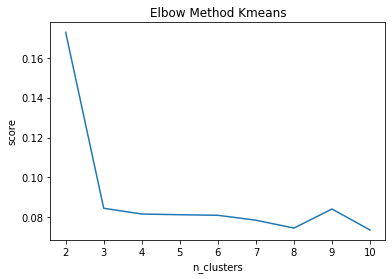

In [67]:
sns.lineplot(x ='n_clusters', y = 'score', data = silhouette_kmeans)
plt.title('Elbow Method Kmeans')

**K-MEANS with 8 clusters**

In [74]:
#In order to save the number for the next speps of the analysis
n_clusters = 8

kmeans2 = KMeans(n_clusters = n_clusters).fit_predict(tf_idfmatrix)
kmeans2

array([1, 5, 5, 6, 5, 5, 5, 5, 0, 3, 4, 4, 1, 4, 4, 5, 5, 5, 5, 3, 7, 5,
       4, 7, 3, 5, 4, 3, 4, 5, 3, 5, 5, 6, 7, 5, 3, 3, 3, 4, 5, 1, 4, 5,
       5, 5, 4, 1, 4, 7, 3, 3, 5, 3, 5, 3, 3, 6, 5, 7, 0, 1, 1, 3, 2, 4,
       4, 4, 0, 5, 5, 5, 6, 5, 4, 1, 2, 1, 5, 4, 4, 5, 4, 4, 4, 5, 5, 7,
       2, 2, 5, 4, 4, 2, 4, 4, 4, 1, 4, 2])

In [75]:
metrics.silhouette_score(tf_idfmatrix, kmeans2)

0.07824981146630032

**DBSCAN**

In [29]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 0.5, min_samples = 2, metric = 'cosine').fit_predict(tf_idfmatrix)

#-1 are noisy samples

In [30]:
metrics.silhouette_score(tf_idfmatrix, db)

0.05464978885972837

<font color='red'>**Comment:**</font> eps is the maximum distance between two samples for one to be considered as in the neighborhood of the other.
Below we'll try to change the number of samples in an epsilon (i.e. the parameter eps) range that define if one point could be considered as a core point. Unfortunately a lot of samples are noisy and they are classified as -1.

In [31]:
silhouette_DBSCAN = pd.DataFrame({'n_clusters':[x for x in range(2,11)]})
#we'll create the column 'silhouettes_score' when the score is calculated
for i in range(0,9):  #the dataframe 8 rows
    
    temp_clustering = DBSCAN(eps = 0.5, min_samples = silhouette_DBSCAN.n_clusters[i], metric = 'cosine').fit_predict(tf_idfmatrix)
    
    silhouette_DBSCAN.loc[[i],'score'] = metrics.silhouette_score(tf_idfmatrix, temp_clustering)


In [32]:
silhouette_DBSCAN

,n_clusters,score
0,2,0.054650
1,3,0.062078
2,4,0.059557
3,5,0.046136
4,6,0.045470
5,7,-0.006532
6,8,-0.009400
7,9,-0.009400
8,10,-0.009400


Text(0.5, 1.0, 'Elbow Method DBSCAN')

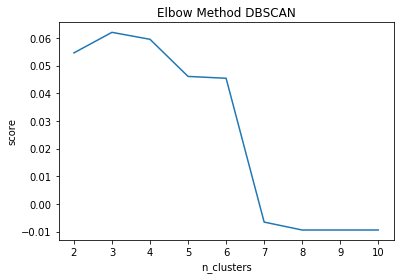

In [33]:
sns.lineplot(x ='n_clusters', y = 'score', data = silhouette_DBSCAN)
plt.title('Elbow Method DBSCAN')

<font color='red'>**Comment:**</font> in this attempt we can only say that it could be interesting to set 3 as the number of point that have to be in the epsilon range to classified a point as core point.

**AFFINITY PROPAGATION**

In [34]:
from sklearn.cluster import AffinityPropagation

AF = AffinityPropagation(affinity = 'euclidean', preference = -2).fit_predict(tf_idfmatrix)
AF

array([0, 3, 1, 1, 1, 1, 1, 3, 3, 2, 4, 4, 0, 3, 4, 1, 1, 3, 3, 4, 4, 3,
       4, 4, 2, 4, 3, 2, 4, 1, 2, 1, 1, 0, 4, 2, 1, 3, 2, 3, 1, 0, 3, 1,
       1, 1, 4, 0, 1, 1, 2, 4, 1, 2, 3, 2, 4, 2, 2, 4, 4, 0, 0, 1, 4, 4,
       4, 4, 4, 3, 1, 1, 1, 1, 4, 0, 4, 0, 3, 4, 4, 2, 4, 4, 4, 1, 3, 1,
       4, 4, 2, 3, 3, 4, 3, 3, 3, 4, 4, 4], dtype=int64)

In [35]:
metrics.silhouette_score(tf_idfmatrix, AF)

0.015135733550744017

<font color='red'>**Comment:**</font> AffinityPropagation is a new type of clustering method (2007). It doesn't require the estimation of the number of clusters before running the alghoritm. It finds 'exemplars'. They are the memebers of the input set that are representative of the clusters. It uses negative squared Euclidean distances by default to compute the similarity matrix. If you set the input preference to the minimal Euclidean distance, you get a positive value, while all similarities are negative.  I'd rather suggest to set the input preference to the minimal negative squared distance, i.e. -1 times the square of the largest distance in the data set.

### EXERCISE 13
Once you have determined the best technique for your data, with the best values for the parameters (e.g., number of clusters), inspect the clustering done under these settings and try to look at which are the common terms, or the titles of the movies that belong to the same group.

<font color='red'>**Comment:**</font> although **the Silhouette Score calculated for the Agglomerative Clustering was good**, the film partition among clusters **wasn't so staisfying**. In fact, with Agglomerative Clustering, the major part of films was in cluster 0 and this didn't mean much. So, we notice that a better classification is reported with the usage of the **K-Means alghoritm**. On the other hand, **the K-Means Silhouette Score is nearer to zero than to 1** and this means that clusters aren't so diversified.

In [36]:
title_and_cluster = pd.DataFrame({'title': tf_idfmatrix.index, 'cluster': kmeans2 })

In [37]:
title_and_cluster.head()

,title,cluster
0,The Godfather,3
1,The Shawshank Redemption,2
2,Schindler's List,4
3,Raging Bull,4
4,Casablanca,4


In [38]:
title_and_cluster.cluster.value_counts()

4    34
0    25
5    14
3     8
1     6
7     5
2     5
6     3
Name: cluster, dtype: int64

<font color='red'>**Comment:**</font> we've just created a  dataframe with every film associated to its cluster. This is useful to understand, through the **.value_counts()** function, the partition of films among clusters. In this phase it is important **to highlight cluster 3**, which we discuss about further later.

In [39]:
# n_max  = max number of top commom words that i need to find
# cluster_number = number of the cluster
# df_idfmatrix = DataFrame with frequencies for each words
# title_and_cluster = Dataframe with the title of the films and the clusterts in which belongs

def find_words_max_frequenties_of_one_cluster (n_max, cluster_number, df_idfmatrix, title_and_cluster):
    
        temp_df = df_idfmatrix.merge(title_and_cluster, left_index = True, right_on = 'title').set_index('title')
        
        #find every title that belongs to the 'cluster_number'
        for i in temp_df.index:
            if temp_df.cluster[i] != cluster_number:
                temp_df = temp_df.drop(index = i) 
                
        temp_df = temp_df.drop(columns = 'cluster')        
        alfa = dict(temp_df.sum())
        
        beta = dict(sorted(alfa.items(), reverse = True, key = lambda x: (x[1],x[0]))[:n_max])
        
        return beta

<font color='red'>**Comment:**</font> this function has been created *ad hoc* in order to satisfy our need to find out **what are the most frequent words in each cluster**. It returns beta, which is a dictionary with words as keys and the frequency value as values. **The input of this function are**: the number of clusters (**k**), the frequency matrix (**df**) and a dataframe that associates every film to the cluster they belong (**title_and_cluster**).

In [76]:
print('Cluster partition: \n\n')

for k in range(n_clusters):
    
    #Print the most common words in cluster k
    sentenceW = 'Cluster {} most frequent words: '.format(k)
    top_words_cluster_k = find_words_max_frequenties_of_one_cluster(5, k, tf_idfmatrix, title_and_cluster)
    sentenceW = sentenceW + ', '.join(top_words_cluster_k.keys())
    print (sentenceW, end ='.\n\n')

    #print films that belong to the k cluster
    sentenceT = 'Cluster {} titles: '.format(k)
    for a, i in enumerate(title_and_cluster.index):
        if title_and_cluster['cluster'][i] == k:
            sentenceT = sentenceT + title_and_cluster['title'][i] + ', '
    print(sentenceT[:-2], end ='.\n\n\n\n')

Cluster partition: 


Cluster 0 most frequent words: tell, car, see, get, say.

Cluster 0 titles: Vertigo, Psycho, On the Waterfront, Sunset Blvd., Chinatown, It's a Wonderful Life, Some Like It Hot, Unforgiven, Rocky, To Kill a Mockingbird, The Searchers, High Noon, The French Connection, City Lights, Fargo, Nashville, The Graduate, American Graffiti, Pulp Fiction, Double Indemnity, The Maltese Falcon, Taxi Driver, Rear Window, The Third Man, North by Northwest.



Cluster 1 most frequent words: learn, look, like, first, young.

Cluster 1 titles: All Quiet on the Western Front, Shane, Stagecoach, Mutiny on the Bounty, Wuthering Heights, Yankee Doodle Dandy.



Cluster 2 most frequent words: prison, john, order, guard, tell.

Cluster 2 titles: The Shawshank Redemption, One Flew Over the Cuckoo's Nest, A Clockwork Orange, The Green Mile, Good Will Hunting.



Cluster 3 most frequent words: famili, apart, relationship, deal, camp.

Cluster 3 titles: The Godfather, The Godfather: Part II,

<font color='red'>**Comment:**</font> with this view we highlight the films and the most five frequent words for every films. Cluster 3 contains only six titles and for each of them there isn't a real plot, but only a message that there isn't one! So, we can adfirm that the alghoritm works good because it was able to group this six films.

**QUALITATIVE PLOTTING**

<font color='red'>**Comment:**</font> We want to plot all the data. For this porpouse we search on the web libraries how to plot the kmeans2 graph

In [77]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.manifold import MDS

In [78]:
#In the first step, we proceed with the similarity_cosine analysis:

from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tf_idfmatrix)

df_dist = pd.DataFrame(dist)
df_dist.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,7.245350e-01,7.520621e-01,0.768908,7.025582e-01,0.666598,0.508349,0.730013,0.742123,0.712126,...,0.770511,0.667525,0.602111,0.963285,0.665727,0.710774,0.582365,0.599235,0.585167,0.963285
1,0.724535,-4.440892e-16,6.920966e-01,0.770767,6.674438e-01,0.681331,0.621919,0.703460,0.598266,0.760474,...,0.772966,0.759874,0.614123,0.897076,0.666184,0.719806,0.613648,0.792594,0.628741,0.897076
2,0.752062,6.920966e-01,-2.220446e-16,0.807772,6.897394e-01,0.770532,0.609345,0.798322,0.773718,0.661940,...,0.689549,0.781437,0.737249,0.982557,0.730319,0.786272,0.718200,0.792091,0.712447,0.982557
3,0.768908,7.707668e-01,8.077716e-01,0.000000,7.918238e-01,0.760583,0.694450,0.845502,0.806170,0.856364,...,0.804201,0.830021,0.770632,0.971263,0.786041,0.755329,0.746508,0.738202,0.726682,0.971263
4,0.702558,6.674438e-01,6.897394e-01,0.791824,2.220446e-16,0.683666,0.559878,0.696099,0.627560,0.642339,...,0.648204,0.611328,0.644971,0.904035,0.618998,0.722462,0.618815,0.786142,0.603460,0.904035


In [79]:
#Some information about the algorithm that we use to plot: 

# we convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.

MDS()

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [80]:
#set up colors per clusters using a dict (or cluster)

cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e', 5: '#021bd9', 
                  6: '#ff0400', 7: '#03ecfc' }

#set up cluster names using a dict
cluster_names = {0: '0', 
                 1: '1', 
                 2: '2', 
                 3: '3', 
                 4: '4',
                 5: '5',
                 6: '6',
                 7: '7'}

C:\Users\Kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


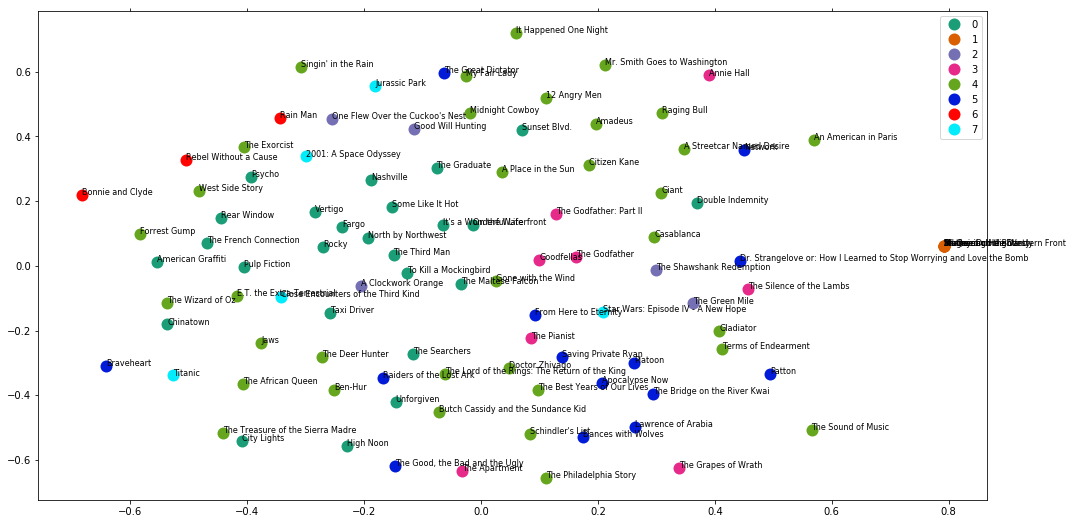

In [81]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df1 = pd.DataFrame(dict(x=xs, y=ys, label= list(title_and_cluster['cluster']) , title=list(title_and_cluster['title']))) 

#group by cluster
groups = df1.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df1)):
    ax.text(df1.ix[i]['x'], df1.ix[i]['y'], df1.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

# <font color='RED'>**CONCLUSIONS:**</font>
    
    

By the conclusion of our analysis, with the comparison between the various cluster algorithms, we noticed that the best choice which fit our data is the K-Means algorithm. Its first step is to create a multitude of ‘centroids’ which represent the number of output classes. The second step consists in finding the nearest points to a centroid and to assign them to its category. Then, the algorithm computes the average of all the points which have been attributed to that class. The output of this computation will be the new centroid for that class. The second step is repeated until the algorithm converges, so the centroids do not change anymore.

On the other hand, this algorithm has not the best silhouette score value. In fact, the best one belongs to the Agglomerative clustering with linkage “average”. This happens because Agglomerative clustering groups almost all films in a single cluster. But doing this, it put in the same group films that have nothing in common (e.g. Jurassic Park and Rain Man) because of their characteristics (i.e. plots, genres, etc.).
However, the usage of the K-Means algorithm allows us to obtain a better films partition and, because it is more meaningful, we decide to use it instead of other Hierarchical Algorithms. <font color='RED'>As we can see in the Appendix (Notebook_3 - line 35) che Agglomerative clustering algorithm not separate very clear the films and the most common words aren't very characterizing for the understanding of how the algorithm worked in the separation of films.</font>

We must affirm that in the K-Means class we kept the *random_state* parameter as default value None. With this setting, the centroid initialization is random. In fact, in this case, the algorithm uses the global random state from *numpy.random*. We decided so because of the Silhouette Score increment which such regulation.

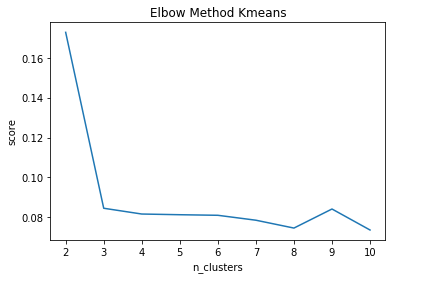
 
Moreover, as can be seen from the graphs above, plotting the K-Means Silhouette in function of the number of clusters, we can notice that there is a real angle after which the Silhouette Score varies little. The Elbow Method suggests us to choose 3 as the number of clusters but, because of its being a heuristic method, we believe that also the variation after 8 cluster, because of the little size of numbers, is small. The Elbow method is a heuristic method and it could be ambiguous: the user needs to choose carefully the number of cluster because it could depend on the context.
The comparison between the methods we could have used is reported in the table below, where every algorithm is related with its own Silhouette Score.

ALGORITHM | SILHOUETTE SCORE | NUMBER OF CLUSTERS
------------------ |----------------------|----------|
Agglomerative clustering (with average linkage)|0.1859915192302945 |4
K-Means |0.07824981146630032|8
K-Means |0.08777049512395997|3
DBSCAN	|0.05464978885972829|-
Affinity Propagation|0.015135733550744022|-

<font color='RED'> Speaking about how kmeans worked on the separation of each cluster, we report some example of most common work:
- cluster 5 most common words: soldier, command, men, kill, american

although the films that are belonging to those clusters are quite differents, we can see very clear the classification method that kmeans used. In that case, for example, the cluster 5's synopses talk about the "war".

Although the value of the silhoutte suggests using eight clusters, we can see how it is better to use 5 clusters as we used in the Appendix, where the analysis had a more significant results. Probably this is due to the fact that the films belonging to the film cluster without synopsis have been removed (like they were "outliers"). (INSERIRE IMMAGINE DELL'APPENDICE DOVE MOSTRA I CLUSTER E LE MOST COMMON WORDS)</font>

We think that it would have been more useful to have a more relevant number of films because we would have a greater frequency of more characteristic words which would bring us to distinguish better the synopsis.

<font color='RED'>In conclusion we are sure that for a more complete analysis of clustering on films, the only parameter that should be considered is not only the synopsis, but also other peculiarities such as gender, rating, actors, etc. However, 
although there are limitations in the analysis, we are satisfied with the clusters that we obtained and the results we have reached.</font>